In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Last inn datasettet
housing = pd.read_csv('AmesHousing.csv')

# Identifiser kategoriske kolonner
categorical_cols = housing.select_dtypes(include=['object']).columns

# Fyll manglende verdier med 'Unknown'
housing[categorical_cols] = housing[categorical_cols].fillna('Unknown')

# One-hot encode
housing_encoded = pd.get_dummies(housing, columns=categorical_cols, drop_first=True)

# Sjekk resultatet
print(housing_encoded.head())

   Order        PID  MS SubClass  Lot Frontage  Lot Area  Overall Qual  \
0      1  526301100           20         141.0     31770             6   
1      2  526350040           20          80.0     11622             5   
2      3  526351010           20          81.0     14267             6   
3      4  526353030           20          93.0     11160             7   
4      5  527105010           60          74.0     13830             5   

   Overall Cond  Year Built  Year Remod/Add  Mas Vnr Area  ...  \
0             5        1960            1960         112.0  ...   
1             6        1961            1961           0.0  ...   
2             6        1958            1958         108.0  ...   
3             5        1968            1968           0.0  ...   
4             5        1997            1998           0.0  ...   

   Sale Type_ConLw  Sale Type_New  Sale Type_Oth  Sale Type_VWD  \
0            False          False          False          False   
1            False      

In [6]:
# Sjekk datatyper
print(X_train.dtypes)

# Konverter ikke-numeriske kolonner til numeriske (om nÃ¸dvendig)
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Sjekk for manglende verdier
print(X_train.isnull().sum())
print(X_test.isnull().sum())

# Fyll manglende verdier
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

# Kontroller dimensjoner
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# Hvis du har brukt one-hot encoding
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Tren modellen
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

Order                       int64
PID                         int64
MS SubClass                 int64
Lot Frontage              float64
Lot Area                    int64
                           ...   
Sale Condition_AdjLand       bool
Sale Condition_Alloca        bool
Sale Condition_Family        bool
Sale Condition_Normal        bool
Sale Condition_Partial       bool
Length: 278, dtype: object
Order                       0
PID                         0
MS SubClass                 0
Lot Frontage              393
Lot Area                    0
                         ... 
Sale Condition_AdjLand      0
Sale Condition_Alloca       0
Sale Condition_Family       0
Sale Condition_Normal       0
Sale Condition_Partial      0
Length: 278, dtype: int64
Order                      0
PID                        0
MS SubClass                0
Lot Frontage              97
Lot Area                   0
                          ..
Sale Condition_AdjLand     0
Sale Condition_Alloca      0
Sale Condit

LinearRegression()

In [10]:
from sklearn.metrics import mean_squared_error, r2_score

# Gjør prediksjoner
y_pred = model.predict(X_test)

# Beregn MSE og R²-score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 1238484664.256804
R² Score: 0.8455282494186996


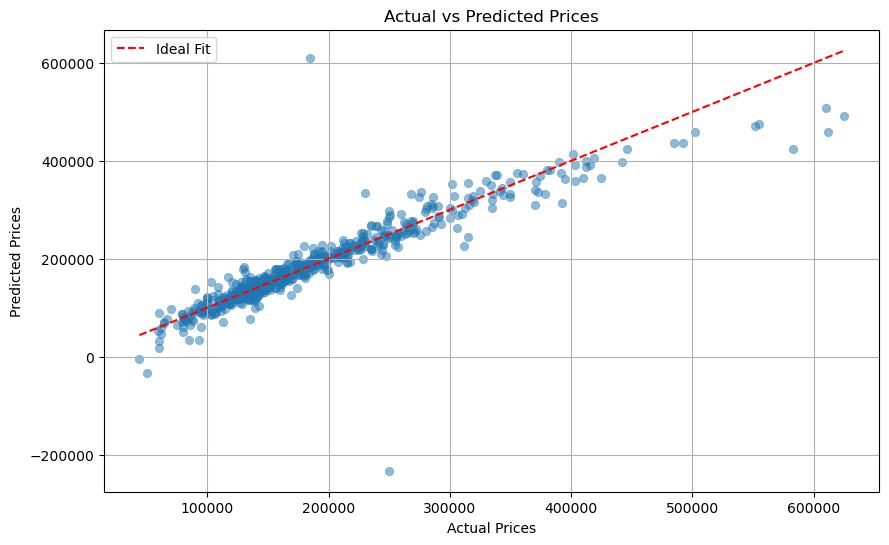

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_regression_results(y_test, y_pred):
    results_df = pd.DataFrame({
        'Actual': y_test,
        'Predicted': y_pred
    })
    results_df = results_df.sort_values(by='Actual')

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Actual', y='Predicted', data=results_df, alpha=0.5, edgecolor=None)
    plt.plot(results_df['Actual'], results_df['Actual'], color='red', linestyle='--', label='Ideal Fit')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title('Actual vs Predicted Prices')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_regression_results(y_test, y_pred)